## Bem-vindo!

##### Esse projeto visa calcular a capacitância em capacitores **idênticos** de placas paralelas, associados tanto em série quanto em paralelo, com o intuito de analisar a influência da geometria e de materiais dielétricos na capacidade de armazenamento de carga. (Proposta de projeto 5)

**Feito por:** Arthur de Carvalho, Marcel Figueredo e Paulo de Pinho

**Bibliotecas externas usadas:** Matplotlib (obrigatório), Numpy (opcional) e Ipywidgets (opcional)

**Constante usada para permissividade do vácuo ($\epsilon_0$):** $8,854 \times 10^{-12}$ F/m

### Instruções de Uso:

1.  **Execute as células em ordem:** Comece pela primeira célula de código (importação de bibliotecas) e execute-as sequencialmente.
    * *Atalho: Pressione `Shift + Enter` para executar uma célula e ir para a próxima.*
2.  **Execute tudo de uma vez (Opcional):**
    * Se preferir, vá ao menu superior e selecione `Run` > `Run All Cells` (Executar Tudo).
    * Isso irá pedir os dados de entrada imediatamente e executar o notebook do início ao fim.
3.  **Insira os dados de entrada:** Ao executar a célula de "Entrada de Dados", você precisará digitar quatro valores:
    * **Área (cm²):** A área das placas do capacitor (ex: `30`). O código converterá para metros automaticamente.
    * **Distância (mm):** A distância entre as placas (ex: `12`). O código converterá para metros automaticamente.
    * **Material:** O nome do material isolante (veja a tabela abaixo).
    * **Número de Capacitores:** Quantos capacitores serão usados na associação (ex: `3`).
    * ***(Nota sobre decimais):** Você pode inserir números com casas decimais usando tanto **vírgula** (ex: `0,5`) quanto **ponto** (ex: `0.5`).*
4.  **Escolha do Material Dielétrico:**
    * Consulte a tabela abaixo para ver os materiais disponíveis (ex: `vidro`, `papel`, `vacuo`).
    * O programa possui um **sistema de validação**: se você digitar um material incorreto, ele pedirá novamente até que você digite um válido. A digitação não diferencia maiúsculas de minúsculas e não considera (ex: "Vidro" e "vidro" funcionam).
    * **Atenção (Bug do Jupyter):** Em testes realizados, notou-se um conflito com a interface do Jupyter onde digitar a tecla 'o' minúscula pode ocultar a saída da célula. **Se enfrentar esse problema, segure a tecla** `Shift` **ao digitar** (ex: use `Shift` + `o` para digitar 'O'). O programa aceitará a entrada normalmente.
5.  **Analise os resultados:**
    * O código calculará a capacitância **individual**, **equivalente em série** e **equivalente em paralelo**.
    * Um gráfico de barras será gerado automaticamente comparando essas grandezas.
6.  **Parte Extra (Opcional - Simulação de Bateria):**
    * A última parte do projeto simula a aplicação de uma tensão ($V$) para visualizar a carga ($Q$).
    * **Requisitos:** Esta funcionalidade requer as bibliotecas adicionais `numpy` e `ipywidgets`.
    * Se você não tiver essas bibliotecas instaladas, o código avisará e encerrará a execução sem erros críticos, mas sem exibir o gráfico interativo.

#### Tabela de materiais dielétricos disponíveis, com suas respectivas constantes dielétricas (k):

| Material     | k      |
| ------------ | ------ |
| Vácuo        | 1,0    |
| Ar           | 1,0006 |
| Poliestireno | 2,6    |
| Plástico     | 3,0    |
| Papel        | 4,2    |
| Vidro        | 5,1    |
| Porcelana    | 6,0    |
| Alumina      | 8,5    |

In [1]:
# --- Importando bibliotecas e declarando constantes globais ---

import unicodedata # para normalizar textos (nativa do Python)
import matplotlib.pyplot as plt # para plotar gráficos (biblioteca externa)

EPSILON_0 = 8.854e-12 # permissividade do vácuo (Farads por metro)

materiais_dieletricos = { # dicionário de materiais dielétricos (Constante k)
    'vacuo': 1.0,
    'ar': 1.0006,
    'poliestireno': 2.6,
    'plastico': 3.0,
    'papel': 4.2,
    'vidro': 5.1,
    'porcelana': 6.0,
    'alumina': 8.5
}

In [2]:
# --- Funções de cálculos físicos ---

# Para calcular a capacitância individual de um capacitor:
def calcular_capacitancia_individual(area_cm2, dist_mm, material): 
    # garante que erros não gerem problemas:
    if dist_mm <=0:
        raise ValueError("A distância entre as placas deve ser maior que zero.")
    if area_cm2 <=0:
        raise ValueError("A área das placas deve ser maior que zero.")
    if material not in materiais_dieletricos:
        raise ValueError("Material dielétrico desconhecido. Escolha entre: " + ", ".join(materiais_dieletricos.keys()))
    # converte os dados fornecidos para o SI:
    area_m2 = area_cm2 * 1e-4 # cm² para m²
    dist_m = dist_mm * 1e-3 # mm para m

    # realiza o cálculo:
    k = materiais_dieletricos[material] # constante Dielétrica com base no nome do material fornecido
    return (k * EPSILON_0 * area_m2) / dist_m # fórmula: C = (k * E0 * A) / d

# Para calcular a capacitância equivalente de uma associação de capacitores em série:
def calcular_capacitancia_serie(capacitancia_individual, num_capacitores):
    if num_capacitores <= 0:
        raise ValueError("O número de capacitores deve ser pelo menos 1.")
    return capacitancia_individual / num_capacitores # fórmula: Ceq = C / n

# Para calcular a capacitância equivalente de uma associação de capacitores em paralelo:
def calcular_capacitancia_paralelo(capacitancia_individual, num_capacitores):
    if num_capacitores <= 0:
        raise ValueError("O número de capacitores deve ser pelo menos 1.")
    return capacitancia_individual * num_capacitores # fórmula: Ceq = C * n

In [5]:
# --- Funções auxiliares ---

# Para converter Farads para pF, nF, µF ou mF automaticamente (para melhor leitura):
def formatar_capacitancia(valor_farads): 
    if valor_farads == 0:
        return "0 F"
    if valor_farads < 1e-9:
        return f"{valor_farads * 1e12:.2f} pF" # PicoFarads
    elif valor_farads < 1e-6:
        return f"{valor_farads * 1e9:.2f} nF"  # NanoFarads
    elif valor_farads < 1e-3:
        return f"{valor_farads * 1e6:.2f} µF"  # MicroFarads
    else:
        return f"{valor_farads * 1e3:.2f} mF"  # MiliFarads

# Para converter Coulombs para pC, nC, µC ou mC automaticamente (para melhor leitura):
def formatar_carga(valor_coulombs): 
    if valor_coulombs == 0:
        return "0 C"
    if valor_coulombs < 1e-9:
        return f"{valor_coulombs * 1e12:.2f} pC" # PicoCoulombs
    elif valor_coulombs < 1e-6:
        return f"{valor_coulombs * 1e9:.2f} nC"  # NanoCoulombs
    elif valor_coulombs < 1e-3:
        return f"{valor_coulombs * 1e6:.2f} µC"  # MicroCoulombs
    else:
        return f"{valor_coulombs * 1e3:.2f} mC"  # MiliCoulombs

# Para facilitar a leitura de valores com casas decimais:
def ler_valor_float(mensagem):
    while True:
        try:
            valor = float(input(mensagem).replace(',', '.')) # lê o input do usuário, troca vírgula por ponto (se houver) e converte para float
            return valor # retorna o valor
        except ValueError:
            print("Entrada inválida. Por favor, digite um número (ex: 12.5).") # caso de erro para entrada inválida (ex: abc)

# Para facilitar a leitura de valores inteiros:
def ler_valor_int(mensagem):
    while True:
        try:
            valor = int(input(mensagem)) # lê o input do usuário e converte para int
            return valor # retorna o valor
        except ValueError:
            print("Entrada inválida. Por favor, digite um número (ex: 12.5).") # caso de erro para entrada inválida (ex: abc)

# Para remover acentos e deixar texto minúsculo:
def normalizar_texto(texto_irregular): 
    texto_nfd = unicodedata.normalize('NFD', texto_irregular) # normaliza para NFD (separa acento da letra)
    texto_sem_acentos_binario = texto_nfd.encode('ascii', 'ignore') # converte para ASCII ignorando os caracteres não-ASCII (os acentos)
    texto_sem_acentos = texto_sem_acentos_binario.decode('utf-8') # decodifica de volta para string
    return texto_sem_acentos.lower() # retorna o texto normalizado e minúsculo

In [10]:
# --- Solicitando os valores iniciais ---
print("\n--- Entrada de Dados ---")

# Coletando valores de área e distância das placas
area_cm2 = ler_valor_float("Informe a área das placas do capacitor (em cm²): ")
dist_mm = ler_valor_float("Informe a distância das placas do capacitor (em mm): ")

# BLOCO DE PROTEÇÃO DO MATERIAL (Evita KeyError)
while True:
    # Mostra as opções disponíveis para ajudar o usuário
    opcoes = ", ".join(materiais_dieletricos.keys())
    print(f"\nMateriais disponíveis: {opcoes}")
    
    entrada_material = input("Informe o nome do material dielétrico desejado: ")
    material = normalizar_texto(entrada_material)
    
    # Verifica se a chave existe no dicionário antes de tentar acessar
    if material in materiais_dieletricos:
        k = materiais_dieletricos[material]
        print(f"-> Material '{material}' selecionado (k={k})")
        break # Sai do loop porque deu certo
    else:
        print(f"Erro: O material '{entrada_material}' não foi encontrado. Tente novamente.")

# Lê o número de capacitores (Validado contra valores nulos ou negativos)
num_capacitores = ler_valor_int("\nInforme o número de capacitores a serem associados: ")

# --- Calculando capacitâncias ---
capacitancia_individual = calcular_capacitancia_individual(area_cm2, dist_mm, material)
capacitancia_serie = calcular_capacitancia_serie(capacitancia_individual, num_capacitores)
capacitancia_paralelo = calcular_capacitancia_paralelo(capacitancia_individual, num_capacitores)


--- Entrada de Dados ---


Informe a área das placas do capacitor (em cm²):  40
Informe a distância das placas do capacitor (em mm):  15



Materiais disponíveis: vacuo, ar, poliestireno, plastico, papel, vidro, porcelana, alumina


Informe o nome do material dielétrico desejado:  VidrO


-> Material 'vidro' selecionado (k=5.1)



Informe o número de capacitores a serem associados:  5


--- Resultados dos Cálculos (Submúltiplos x SI) ---
Área das placas: 30.0 cm² ou 0.003 m²
Distância entre as placas: 12.0 mm ou 0.012 m
Constante dielétrica: 4.2
Número de capacitores: 5

Capacitância individual dos capacitores: 9.30 pF ou 9.2967e-12 F
Capacitância equivalente em paralelo: 46.48 pF ou 4.6483499999999995e-11 F
Capacitância equivalente em série: 1.86 pF ou 1.85934e-12 F
---------------------------------

Gerando gráfico de Capacitância...


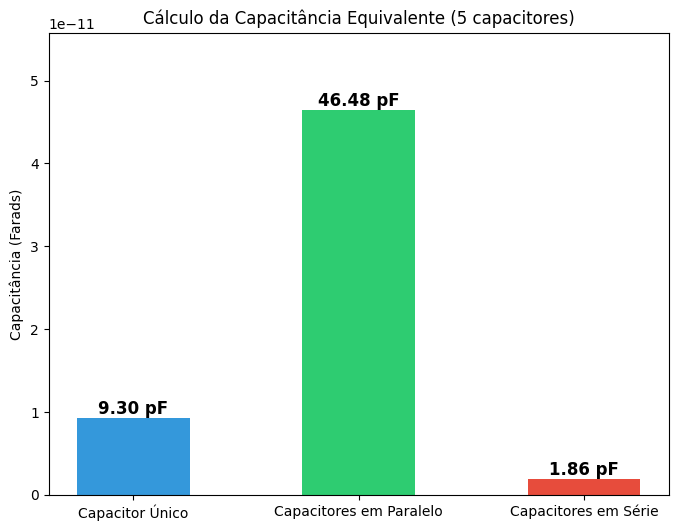

In [7]:
# --- Imprimindo valores dos cálculos de capacitância ---
print("--- Resultados dos Cálculos (Submúltiplos x SI) ---")
print(f"Área das placas: {area_cm2} cm² ou {area_cm2 * 1e-4} m²") # cm² para m²
print(f"Distância entre as placas: {dist_mm} mm ou {dist_mm * 1e-3} m") # mm para m
print(f"Constante dielétrica: {k}")
print(f"Número de capacitores: {num_capacitores}")
print("") # quebra de linha
print(f"Capacitância individual dos capacitores: {formatar_capacitancia(capacitancia_individual)} ou {capacitancia_individual} F")
print(f"Capacitância equivalente em paralelo: {formatar_capacitancia(capacitancia_paralelo)} ou {capacitancia_paralelo} F")
print(f"Capacitância equivalente em série: {formatar_capacitancia(capacitancia_serie)} ou {capacitancia_serie} F")
print("---------------------------------")
print("") # quebra de linha
 
# --- Plotando gráfico de capacitância ---

# Declarando variáveis para o gráfico:
nomes = ['Capacitor Único', 'Capacitores em Paralelo', 'Capacitores em Série'] # definindo rótulos para os valores exibidos no gráfico
valores = [capacitancia_individual, capacitancia_paralelo, capacitancia_serie] # definindo valores a serem exibidos
cores = ['#3498db', '#2ecc71', '#e74c3c'] # definindo cores para as barras do gráfico

# Construindo o gráfico:
fig, ax = plt.subplots(figsize=(8, 6)) # inicializando o gráfico e definindo suas dimensões
barras = ax.bar(nomes, valores, color=cores, width=0.5) # plotando as barras do gráfico
ax.set_title(f'Cálculo da Capacitância Equivalente ({num_capacitores} capacitores)') # definindo título do gráfico
ax.set_ylabel('Capacitância (Farads)') # definindo rótulo vertical

# Adicionando o valor da capacitância formatado em cima de cada barra:
for barra, valor in zip(barras, valores):
        height = barra.get_height()
        texto = formatar_capacitancia(valor)
        ax.text(barra.get_x() + barra.get_width()/2., height,
                f'{texto}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Fazendo um ajuste para garantir que as barras não fiquem coladas no topo
ax.set_ylim(0, max(valores) * 1.2)

print("Gerando gráfico de Capacitância...")
plt.show()

In [8]:
# --- Segunda parte do Projeto (extra) ---

print("Observação: essa parte do projeto requer as dependências numpy e ipywidgets")
resposta = input("Deseja aplicar uma bateria no circuito para visualizar o armazenamento de cargas pelos capacitores? (s/n)") 
resposta = resposta.lower()
if resposta == "s":

    try:
        # Tenta importar todas as bibliotecas necessárias
        import numpy as np # para criar arrays para o gráfico 
        from ipywidgets import interact, fixed # para manipular o gráfico dinamicamente
        
    except ImportError as e:
        # Se alguma falhar, o código cai aqui
        biblioteca_faltante = e.name
        
        print("="*60)
        print(f"ERRO CRÍTICO: Falta a biblioteca '{biblioteca_faltante}'")
        print("="*60)
        print("\nEssa parte do programa não pode ser executada sem as dependências.")
        print("A execução continuará, mas o gráfico interativo não será exibido.")

    else:
        # Este bloco só roda se as importações funcionarem

        def plotar_comparacao_capacitores(c_ind, c_par, c_ser, v_max=100.0):
            volts = np.linspace(0, v_max, 100) # cria um array do numpy com a tensão máxima fornecida
            
            # Cálculos das cargas (Q = C * V)
            q_ind = c_ind * volts
            q_par = c_par * volts
            q_ser = c_ser * volts
            
            plt.figure(figsize=(10, 6)) # inicializando o gráfico e definindo suas dimensões
            
            # Formatação dos valores de capacitância para uso nos labels
            txt_c_ind = formatar_capacitancia(c_ind)
            txt_c_par = formatar_capacitancia(c_par)
            txt_c_ser = formatar_capacitancia(c_ser)
            
            # --- PLOTAGEM DAS 3 LINHAS ---
            
            # 1. Paralelo
            label_par = f'Associação Paralelo ({txt_c_par})' # rótulo das barras
            plt.plot(volts, q_par, color='green', linewidth=2, label=label_par) # valores e propriedades
            
            # 2. Capacitor Único (cenário hipotético de um capacitor sozinho, não parte do conjunto)
            label_ind = f'Capacitor Único/Ref. ({txt_c_ind})' # rótulo das barras
            plt.plot(volts, q_ind, color='darkorange', linewidth=2, linestyle='-', label=label_ind) # valores e propriedades
            
            # 3. Série
            label_ser = f'Associação Série ({txt_c_ser})' # rótulo das barras
            plt.plot(volts, q_ser, color='purple', linewidth=2, linestyle='-.', label=label_ser) # valores e propriedades

            # Marcadores visuais no ponto máximo
            plt.scatter([v_max]*3, [q_par[-1], q_ind[-1], q_ser[-1]], 
                        color=['green', 'darkorange', 'purple'], zorder=5)
            
            # --- ADICIONAR VALORES FORMATADOS À DIREITA DO GRÁFICO ---
            # Calcular as cargas no ponto final (v_max)
            q_par_final = q_par[-1]
            q_ind_final = q_ind[-1]
            q_ser_final = q_ser[-1]
            
            # Formatar os valores das cargas
            txt_q_par = formatar_carga(q_par_final)
            txt_q_ind = formatar_carga(q_ind_final)
            txt_q_ser = formatar_carga(q_ser_final)

            # Posicionar os textos à direita dos pontos finais
            offset_x = v_max * 0.02  # 2% do v_max como margem
            # offset_y = v_max * 0.005  # Pequeno offset vertical para separação
        
            # Adicionar textos para cada linha
            plt.text(v_max + offset_x, q_par_final, txt_q_par, 
                    color='green', fontsize=11, fontweight='bold',
                    va='center', ha='left')
            plt.text(v_max + offset_x, q_ind_final, txt_q_ind, 
                    color='darkorange', fontsize=11, fontweight='bold',
                    va='center', ha='left')
            plt.text(v_max + offset_x, q_ser_final, txt_q_ser, 
                    color='purple', fontsize=11, fontweight='bold',
                    va='center', ha='left')
            


            # --- AJUSTES DO GRÁFICO ---
            
            # Expandir limite do eixo x para acomodar os textos
            plt.xlim(0, v_max * 1.15) # limite horizontal
            plt.ylim(0, max(q_par[-1], q_ind[-1], q_ser[-1]) * 1.15) # limite vertical
            
            plt.title(f"Comparação de Carga Armazenada ({num_capacitores} capacitores)") # título
            plt.xlabel("Tensão Aplicada (V)") # rótulo do eixo x
            plt.ylabel("Carga Armazenada (Coulombs)") # rótulo do eixo y
            plt.grid(True, linestyle='--', alpha=0.6) # grade do gráfico
            
            # Legenda com fundo semi-transparente para leitura fácil
            plt.legend(loc='upper left', framealpha=0.95, shadow=True)
            plt.show()

        # --- EXECUÇÃO ---
        interact(plotar_comparacao_capacitores, 
            c_ind=fixed(capacitancia_individual), 
            c_par=fixed(capacitancia_paralelo), 
            c_ser=fixed(capacitancia_serie), 
            v_max=(0.1, 200.0, 0.1))
else:
    print("Fim do programa.")

Observação: essa parte do projeto requer as dependências numpy e ipywidgets


Deseja aplicar uma bateria no circuito para visualizar o armazenamento de cargas pelos capacitores? (s/n) s


interactive(children=(FloatSlider(value=100.0, description='v_max', max=200.0, min=0.1), Output()), _dom_class…

### Referências Bibliográficas

**1. Física Teórica:**
* HALLIDAY, D.; RESNICK, R.; WALKER, J. **Fundamentos de Física**. 10ª edição. Rio de Janeiro: LTC, 2016.
* NUSSENVEIG, Herch M. **Curso de Física Básica 3: Eletromagnetismo**. 5ª Edição. São Paulo: Editora Edgard Blucher, 2013.

**2. Documentação Técnica e Bibliotecas:**
* **Python (Documentação Oficial)**
    Disponível em: <https://docs.python.org/3/>
* **Matplotlib**
    Disponível em: <https://matplotlib.org/stable/users/index.html>
* **Numpy**
    Disponível em: <https://numpy.org/doc/stable/>
* **Ipywidgets**
    Disponível em: <https://ipywidgets.readthedocs.io/en/stable/>
* **Unicodedata (Python Standard Library)**
    Disponível em: <https://docs.python.org/3/library/unicodedata.html>
* **Sys (Python Standard Library)**
    Disponível em: <https://docs.python.org/3/library/sys.html>